# **CS 1810 Homework 0**
---
To account for potential version issues, try the following in your terminal:

1. Create a new environment with `python3 -m venv venv`
2. Activate that environment with `source venv/bin/activate`
3. Make sure the interpreter in the top right corner of your VSCode (or whatever u use to run ur code is venv).
4. If you get a "install kernel" message, press it.
5. Run `pip install -r requirements.txt`
6. Run the remainder of this notebook.

Note that this is not necessary (especially for hw0) but can help prevent any issues due to package versions.

In [80]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt

## 2.1 Plot $y = -3x^2 + 72x + 70$.

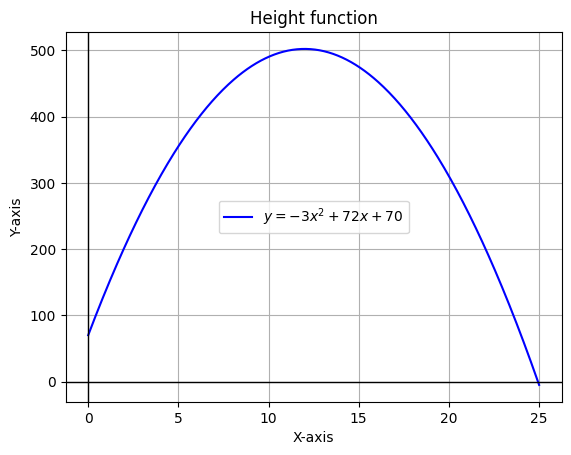

In [81]:
x = np.linspace(0, 25, 500)
y = -3 * x**2 + 72 * x + 70
plt.plot(x, y, label=r"$y = -3x^2 + 72x + 70$", color="blue")
plt.title("Height function")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

plt.axhline(0, color="black", linewidth=1)  # X-axis
plt.axvline(0, color="black", linewidth=1)  # Y-axis
plt.legend()


plt.grid()
plt.show()

## 2.3 Plot $f(x_1, x_2)$.

<Figure size 800x600 with 0 Axes>

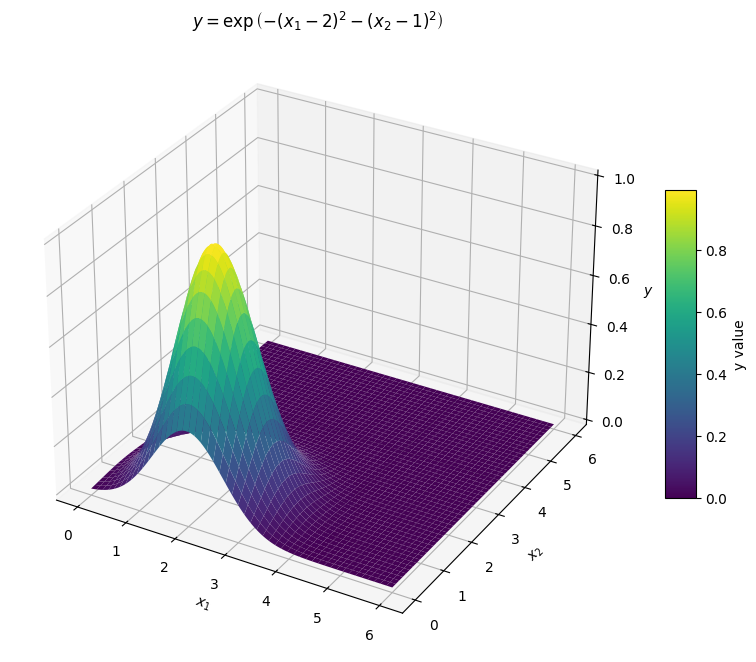

In [82]:
from mpl_toolkits.mplot3d import Axes3D

x1 = np.linspace(0, 6, 500)
x2 = np.linspace(0, 6, 500)

X1, X2 = np.meshgrid(x1, x2)
plt.figure(figsize=(8, 6))


y = np.exp(-(X1 - 2)**2 - (X2 - 1)**2)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


surface = ax.plot_surface(X1, X2, y, cmap='viridis', edgecolor='none')


fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10, label='y value')


ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.set_zlabel(r"$y$")
ax.set_title(r"$y = \exp\left(-(x_1 - 2)^2 - (x_2 - 1)^2\right)$")


plt.show()

## 3.1(b) Draw from joint distribution of $(S, W)$ and generate bivariate histogram.

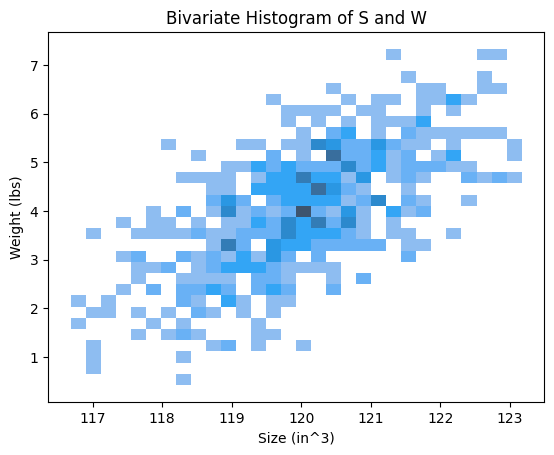

Sample S = 120.04055678234953
Sample W = 4.031005530156837
Theoretical S and W = [120, 4]
We're pretty close!


In [83]:
from scipy.stats import multivariate_normal as mvn

mu = [120,4]
Sigma = [[1.5,1],[1, 1.5]]

n_samp = 500
samples = mvn.rvs(mean = mu, cov = Sigma, size = n_samp)

S = samples[:,0]
W = samples[:,1]

sns.histplot(x=S, y=W, bins=30)
plt.xlabel("Size (in^3)")
plt.ylabel("Weight (lbs)")
plt.title("Bivariate Histogram of S and W")
plt.show()

mean_S = np.mean(S)
mean_W = np.mean(W)
print("Sample S =", mean_S)
print("Sample W =", mean_W)
print("Theoretical S and W =", mu)
print("We're pretty close!")


## 3.2 Plot the joint PDFs at $S=118$ and $S=122$, varying $W$.

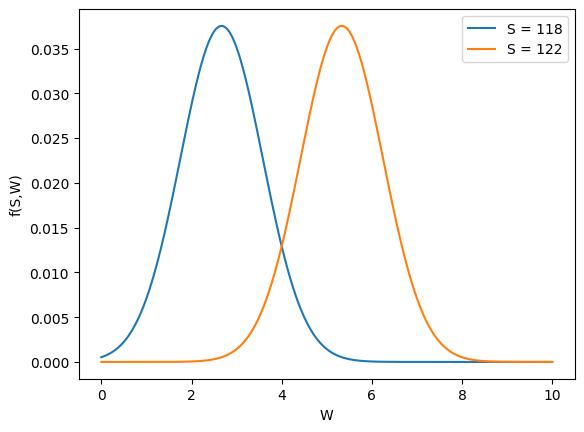

In [84]:
W= np.linspace(0, 10, 1001)
rv = mvn(mean=mu, cov=Sigma)

pdf118 = []
pdf122 = []

for w in W:
    pdf118.append(rv.pdf([118, w]))
    pdf122.append(rv.pdf([122, w]))


plt.plot(W, pdf118, label='S = 118')
plt.plot(W, pdf122, label='S = 122')
plt.xlabel('W')
plt.ylabel('f(S,W)')
plt.legend()
plt.show()


## 3.5(a) Function to simulate draws from $T^{*}$.

In [85]:
mu = np.array([120, 4])
Sigma = np.array([[1.5, 1.0], [1.0, 1.5]])

def drawTstar():
    N = np.sum(np.random.poisson(lam = 3, size = 24))

    if N == 0:
        return 0
    
    SW = np.random.multivariate_normal(mean=mu, cov=Sigma, size=N)
    S = SW[:,0]
    W = SW[:,1]

    epsilon = np.random.normal(loc=0, scale=np.sqrt(5), size=N)
    T = 60 + 0.6*W + 0.2*S + epsilon

    Tstar = np.sum(T)
    return Tstar



## 3.5(b) Empirically estimate the mean and standard deviation of $T^{*}$ by generating $1000$ samples.

In [86]:
Tstars = []
num_draws = 1000
for i in range(num_draws):
    value = drawTstar()
    Tstars.append(value)


Tstars = np.array(Tstars)


mean_Tstar = np.mean(Tstars)
std_Tstar = np.std(Tstars, ddof=1)  # ddof=1 for sample standard deviation

print("Estimated E[T*] =", mean_Tstar)
print("Estimated Std(T*) =", std_Tstar)


Estimated E[T*] = 6172.169903072168
Estimated Std(T*) = 740.607428955113


# 4.1: Examining the Data

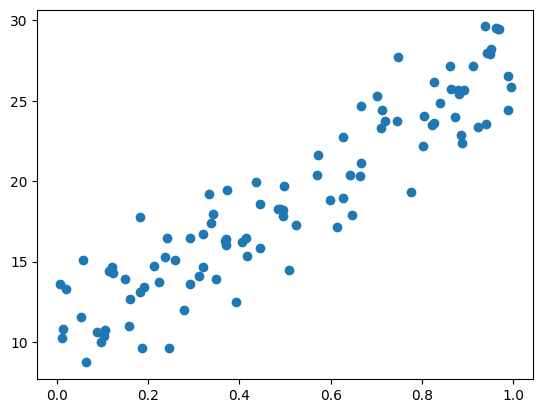

In [87]:
# Steve's solution
data = pd.read_csv("data/points.csv").values
x = data[:, 0]
y = data[:, 1]

plt.scatter(x, y)
plt.show()

## 4.2: Adding the Intercept/Bias Term

In [88]:
# Steve's solution
n = len(x)
intercept = np.ones((n, 1))   
xcol = x.reshape(-1, 1)     
X = np.hstack([intercept, xcol]) 

## 4.4: Implementing the LinearRegression Class

In [89]:
# Steve's solution
class LinearRegression:
    def __init__(self):
        self.w = None

    def fit(self, X, y):
        """
        Fit linear model to the data, estimating weights w.
        """
        self.w = np.linalg.inv(X.T @ X) @ (X.T @ y)

    def predict(self, X):
        """
        Use fitted weights to predict target y given input features X.
        """
        return X @ self.w

FileNotFoundError: [Errno 2] No such file or directory: 'img_output/hw0_p4_4.png'

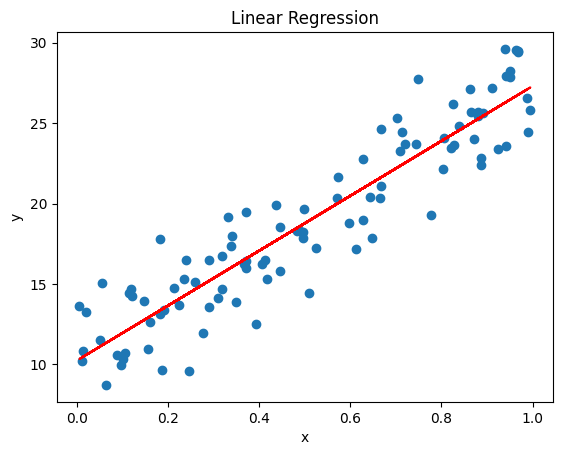

In [90]:
### DON'T MODIFY THIS CELL

# Fit the linear regression
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
# Plot the data and the regression line
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred, color='red')
plt.title("Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('img_output/hw0_p4_4.png')
plt.show()

## 4.5 MSE Computation

In [91]:
# Steve's solution
mse = 0
for i in range(len(y)):
    mse = mse + (y[i] - y_pred[i])**2
mse = mse / len(y)
print(mse)

4.439331220193986


In [93]:
mse = np.mean((y - y_pred)**2)
print(mse)

4.439331220193986
